<a href="https://colab.research.google.com/github/sejin-sim/Data_Mining/blob/main/4_Train_Test_Resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stratified sampling(층화추출법) 
: 모집단을 먼저 중복되지 않도록 층으로 나눈 다음 각 층에서 표본을 추출하는 방법   
![](https://lh3.googleusercontent.com/proxy/fN2ryUL12ILAcePvBy3SLRfgKpgBf97tXUS69rCabboSp8QMPwp8VrV0Qz1zOoziRvxgo7LL1yPauxePvu6bLjqndRjlweTMYA)
> 훈련 또는 검증 세트를 무작위로 선택할 때 우리는
선택한 각 세트에서 등급 비율이 유지되는지 확인






## Split dataset into 3 groups: Traininng set, Test set, validation set


## Train set, Test set의 분류
- 결과에 대한 예측율을 높이기 위해 학습을 수행 하기 이전에 train set과 test set을 구분하여 사용한다.
- 일반화와 성능비교(예측율)
- 홀드 아웃 : Train set을 교차검증을 위해 다수로 나눌 수 있으며, train/test set외에 별도의 검증 데이터(validity set을 준비하여 일반화의 정도와 성능 등을 다시 검증 가능



* 전체 교육 데이터를 사용하여 "최적" 분류기를 선택한 후 오류율을 추정할 수 있다.

* 문제 두가지
1. 최종 모델은 일반적으로 훈련 데이터를 오버핏한다: 새로운 데이터에 일반화할 수 없다. 
> 오버 피팅 문제는 파라미터 숫자가 많은 모델에서 더 뚜렷하다.
2. 오류율 추정치는 지나치게 낙관적일 것이다. (실제 오류율보다 낮음)
> 실제로 훈련 데이터에 대해 100% 정확한 분류가 있는 경우는 드물지 않다.

In [ ]:
# hold out method : Split dataset into two groups: Training set, Test set

import numpy as np
from sklearn.model_selection import train_test_split

X = np.array([[10, 20], [30, 40], [10, 20], [30, 40], [15, 19], [34, 41], [11, 21], [33, 39], [33, 41], [12, 21]])  # create an array
y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0]) # Create another array

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.7, random_state=10) 

print("X_train: \n", X_train, "\ny_train: \n", y_train, "\n\nX_test: \n", X_test, "\ny_test: \n", y_test, '\n') 
print("X_val: \n", X_val, "\ny_val: \n", y_val)


X_train: 
 [[33 39]
 [12 21]
 [11 21]
 [30 40]
 [34 41]] 
y_train: 
 [1 0 0 1 1] 

X_test: 
 [[30 40]
 [10 20]] 
y_test: 
 [1 0] 

X_val: 
 [[33 41]
 [10 20]
 [15 19]] 
y_val: 
 [1 0 0]


# Random Subsampling: repeat hold out

# Cross Validation (교차타당도)
: '동일한 모집단에서 추출한 독립적인 두 표본 집단의 예언 변인과 기준 변인의 관계가 일관성을 유지하는 정도'

1. k-fold cross validation  (랜덤이 없는 경우)
* 데이터를 k개의 데이터 폴드로 분할하고, 각 Iteration마다 test set을 다르게 할당하여 총 k개의 '데이터 폴드 세트 (아래 그림의 경우 train fold 4개 + test fold 1개)'를 구성
* 데이터셋의 크기가 작은 경우 테스트셋에 대한 성능 평가의 신뢰성을 보완하는 방법
* Data를 5개로 나눠서 4개 폴드의 합을 train data로 하고 나머지 1개는 test data로 한다.
>![](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTYz/MDAxNTY0MDY1ODk4NTM0.HiTh5fw3_Fulbq6dv1iLrxS7EmEM4htsWC-5fh-TiGAg.5rbp2nHtWYOZvzoN-Kl4mCKF4nZ4rd5bmO_IDh-sieAg.PNG.ckdgus1433/image.png?type=w800)

2. Leave-one-out cross validation (LOOCV)   
: 전체 데이터(서로 다른 데이터 샘플들) 중에서 1개의 샘플을 선택하여 그것을 모델 검증에 사용하는 방법
>![](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTQg/MDAxNTY0MDY1NjMxMjg2.8ugc6HiRsFIon719Kibr7SCCfhs8zmgKYidiVsTIT-sg.kngfm9wBF_Lp_mVx28ERZT6KasEyzh8ApMoJlg40PVsg.PNG.ckdgus1433/image.png?type=w800) 
>![](https://mblogthumb-phinf.pstatic.net/MjAxOTA3MjVfMTQg/MDAxNTY0MDY1NjMxMjg2.8ugc6HiRsFIon719Kibr7SCCfhs8zmgKYidiVsTIT-sg.kngfm9wBF_Lp_mVx28ERZT6KasEyzh8ApMoJlg40PVsg.PNG.ckdgus1433/image.png?type=w800)

In [ ]:
# LOCV

import numpy as np
from sklearn.model_selection import LeaveOneOut 

X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array(['a', 'b', 'c'])
loo = LeaveOneOut()
loo.get_n_splits(X)  # 분할 반복 횟수 3!

3

In [ ]:
for train_index, test_index in loo.split(X): # 
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print("TRAIN:", train_index, "TEST:", test_index)
   print("X_train:", X_train, '\n',"y_train:", y_train, '\n', "X_test:", X_test, "y_test:", y_test, '\n') 

TRAIN: [1 2] TEST: [0]
X_train: [[3 4]
 [5 6]] 
 y_train: ['b' 'c'] 
 X_test: [[1 2]] y_test: ['a'] 

TRAIN: [0 2] TEST: [1]
X_train: [[1 2]
 [5 6]] 
 y_train: ['a' 'c'] 
 X_test: [[3 4]] y_test: ['b'] 

TRAIN: [0 1] TEST: [2]
X_train: [[1 2]
 [3 4]] 
 y_train: ['a' 'b'] 
 X_test: [[5 6]] y_test: ['c'] 



1. K-Fold Cross-validation (랜덤이 없는 경우)
2. Random Subsampling: K-fold (랜덤이 있는 경우)         


In [ ]:
# K-Fold Cross-validation(랜덤이 없는 경우)

import numpy as np
from sklearn.model_selection import KFold # import KFold

X = np.array([[10, 20], [30, 40], [15, 19], [34, 41], [11, 21], [33, 39]])  # create an array
y = np.array([0, 1, 0, 1, 0,1]) # Create another array
kf = KFold(n_splits=3, random_state=None, shuffle=False)  # Define the split - into 3 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 

for train, test in kf.split(X):
  print("TRAIN: %s TEST: %s" % (train, test))

KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [2 3 4 5] TEST: [0 1]
TRAIN: [0 1 4 5] TEST: [2 3]
TRAIN: [0 1 2 3] TEST: [4 5]


# The bootstrap
> * 무작위 표본 추출에 의존하는 어떤 시험이나 계측이다.
> * 부트스트랩은 표본 추정치들의 (편향, 분포, 신뢰 구간, 오차 예측 또는 기타 추정치들로 정의 되는) 정확도를 할당할 수 있도록 한다.   
![](https://rasbt.github.io/mlxtend/user_guide/evaluate/BootstrapOutOfBag_files/bootstrap_concept.png)




In [ ]:
# Bootstrap

from sklearn.utils import resample
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/DM/carprice.csv')
df.describe()
X=df[['Mileage','Age(yrs)']]
y=df['Sell Price($)']

for i in range(1, 4):
 resampled = resample(df, n_samples=5, random_state= i)
 re_x = resampled[['Mileage','Age(yrs)']]
 re_y = resampled['Sell Price($)']  
 print ("resampled:", i,'\n', resampled, '\n\n')

resampled: 1 
     Unnamed: 0              Car Model  Mileage  Sell Price($)  Age(yrs)
5            5                Audi A5    59000          29400         5
11          11  Mercedez Benz C class    79000          21000         7
12          12  Mercedez Benz C class    59000          33000         5
8            8                Audi A5    91000          12000         8
9            9  Mercedez Benz C class    67000          22000         6 


resampled: 2 
     Unnamed: 0              Car Model  Mileage  Sell Price($)  Age(yrs)
8            8                Audi A5    91000          12000         8
8            8                Audi A5    91000          12000         8
6            6                Audi A5    52000          32000         5
11          11  Mercedez Benz C class    79000          21000         7
2            2                 BMW X5    57000          26100         5 


resampled: 3 
     Unnamed: 0              Car Model  Mileage  Sell Price($)  Age(yrs)
10          1

In [ ]:
# knn : 랜덤 有
import pandas as pd 
df = pd.read_csv('/content/drive/My Drive/DM/carprice.csv')
df.head()


,Unnamed: 0,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,BMW X5,69000,18000,6
1,1,BMW X5,35000,34000,3
2,2,BMW X5,57000,26100,5
3,3,BMW X5,22500,40000,2
4,4,BMW X5,46000,31500,4


In [ ]:
# 특성이름으로 불러오기
X=df[['Car Model', 'Mileage','Age(yrs)']]

In [ ]:
# y 변수 지정하기
y=df['Sell Price($)']

In [ ]:
X.info()
X_dum = pd.get_dummies(X)
X = X_dum
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Car Model  13 non-null     object
 1   Mileage    13 non-null     int64 
 2   Age(yrs)   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)
# random_state는 일종의 seed에 해당 


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the data
knn.fit(X_train, y_train)

#show first 4 model predictions on the test data
knn.predict(X_test)

array([12000, 26100, 18000, 31500])

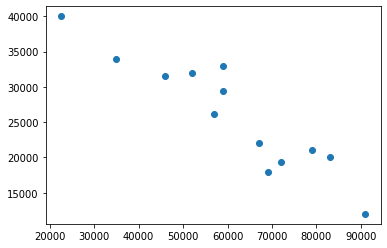

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Mileage'], df['Sell Price($)'])


In [ ]:
knn.predict([[52000, 5, 1, 0, 0]])


array([26100])

In [ ]:
# 랜덤이 없는 경우
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/DM/vote.csv', encoding='utf-8')
X=data.drop(columns='vote')
y=data[['vote']]

from sklearn.model_selection import cross_val_score
cross = cross_val_score(knn, X, y, cv=3, scoring = 'accuracy')
cross

array([0.70422535, 0.67142857, 0.7       ])

In [ ]:
cross.mean()


0.6918846411804157

In [ ]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [ ]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(knn, X, y, cv=3)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])